In [ ]:
pip install scikit-learn-extra

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

In [ ]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


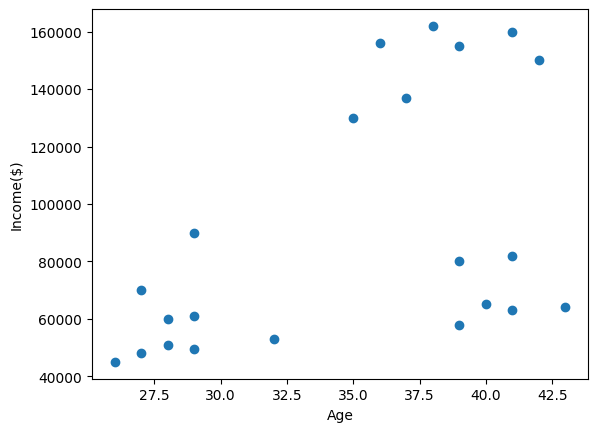

In [ ]:
plt.scatter(data.Age, data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [ ]:
k = 3  # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=0)  # Initialize K-Medoids clustering with 3 clusters
y_predicted = kmedoids.fit_predict(data[['Age', 'Income($)']])  # Fit the K-Medoids model to the data
kmedoids_clusters = kmedoids.labels_  # Get the cluster labels for each data point

In [ ]:
data['cluster'] = y_predicted

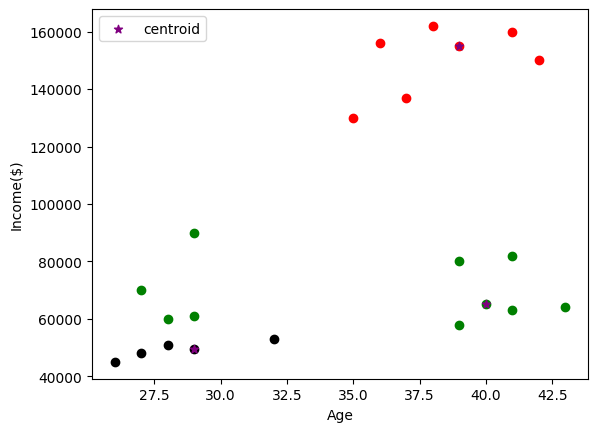

In [ ]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data[['Age', 'Income($)']] = scaler.fit_transform(data[['Age', 'Income($)']])

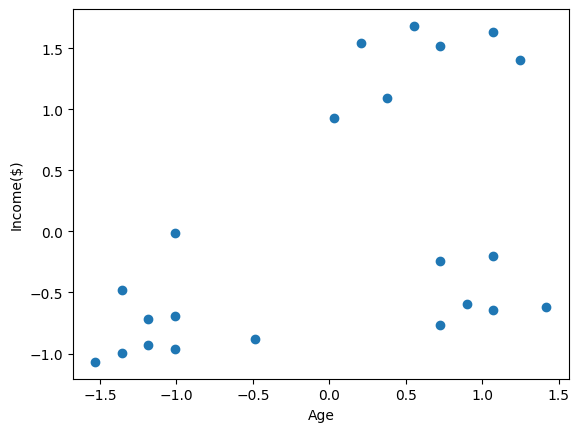

In [ ]:
# Visualize the data using a scatter plot
plt.scatter(data.Age, data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [ ]:
k = 3  # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=0)
# Perform KMeans clustering with 3 clusters on the 'Age' and 'Income($)' columns
# km = KMeans(n_clusters=3)
y_predicted = kmedoids.fit_predict(data[['Age', 'Income($)']])

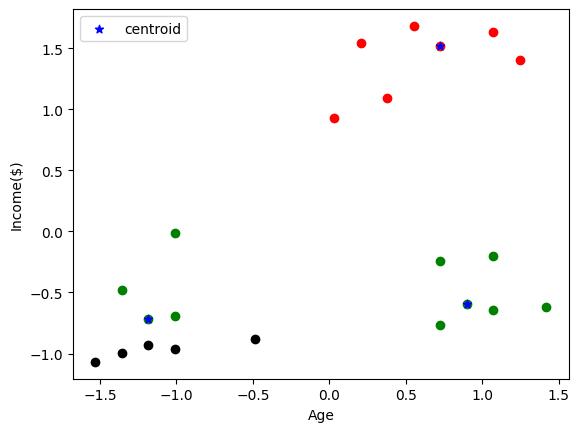

In [ ]:
# Plot the clustered data points along with the centroids after scaling
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], color='blue', marker='*', label='centroid')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()



#Custom

In [ ]:
def calculate_distance_matrix(data): # => This defines a function named calculate_distance_matrix that takes data as input.
    """
    # Calculate the distance matrix for the given data. => This is a docstring explaining the purpose of the function.

    Parameters:
    - data: Input data (numpy array or pandas DataFrame). => This is a parameter description indicating that data can be a numpy array or pandas DataFrame.

    Returns:
    - distance_matrix: Distance matrix where each element (i, j) represents the distance between data points i and j. => This indicates that the function returns a distance matrix.
    """

    if isinstance(data, np.ndarray): # This checks if data is a numpy array.

        data = data                  # This line is redundant and doesn't affect the logic of the code

    elif isinstance(data, pd.DataFrame): # This checks if data is a pandas DataFrame.

        data = data.values #  If data is a DataFrame, this line converts it to a numpy array.

    else:

        raise ValueError("Input data must be a numpy array or pandas DataFrame.") # This raises a ValueError if the input data type is not supported.


    num_points = data.shape[0] # This gets the number of data points.

    distance_matrix = np.zeros((num_points, num_points)) # This initializes a distance matrix with zeros.

    for i in range(num_points): # This starts a loop over each data point for calculating distances.

        for j in range(num_points): # This nested loop calculates the distance between each pair of data points.

            distance_matrix[i, j] = np.linalg.norm(data[i] - data[j]) # This calculates the Euclidean distance between two data points and stores it in the distance matrix.

    return distance_matrix # This returns the calculated distance matrix.

def kmedoids(data, k, max_iterations=300, tol=1e-4): # This defines a function named kmedoids that implements the K-Medoids clustering algorithm.
    """
    K-Medoids clustering algorithm with convergence check.

    Parameters:
    - data: Input data (numpy array or pandas DataFrame).
    - k: Number of clusters.
    - max_iterations: Maximum number of iterations.
    - tol: Tolerance for convergence check.

    Returns:
    - cluster_centers: Final cluster centers.
    - clusters: Cluster assignments for each data point.
    """
    # Initialize medoids randomly
    medoids = np.random.choice(data.shape[0], size=k, replace=False) # This initializes k medoids randomly from the data.

    cluster_centers = data[medoids] # This initializes the cluster centers to the medoids.

    for _ in range(max_iterations): # This loop runs for a maximum number of iterations.

        # Assign each data point to the nearest cluster center (medoid)
        distances = calculate_distance_matrix(data) # This calculates the distance matrix using the calculate_distance_matrix function.

        cluster_assignment = np.argmin(distances[:, medoids], axis=1) # This assigns each data point to the nearest cluster center (medoid).

        # Update cluster centers (medoids)
        for i in range(k): # This loop updates each cluster center (medoid).

            cluster_points = np.where(cluster_assignment == i)[0] # This gets the indices of data points assigned to cluster i.

            new_medoid = cluster_points[np.argmin(np.sum(distances[np.ix_(cluster_points, cluster_points)], axis=1))] # This calculates a new medoid for cluster i.

            medoids[i] = new_medoid # This updates the medoid for cluster i.

            cluster_centers[i] = data[new_medoid] #  This updates the cluster center for cluster i.

        # Check for convergence
        if np.sum(np.abs(cluster_centers - data[medoids])) < tol: # This checks for convergence based on the tolerance.
            break # This breaks out of the loop if convergence is reached.

    # Assign each data point to the nearest final cluster center
    final_distances = calculate_distance_matrix(data) # This calculates the final distance matrix.

    clusters = np.argmin(final_distances[:, medoids], axis=1) # This assigns each data point to the nearest final cluster center.

    return cluster_centers, clusters # This returns the final cluster centers and cluster assignments.


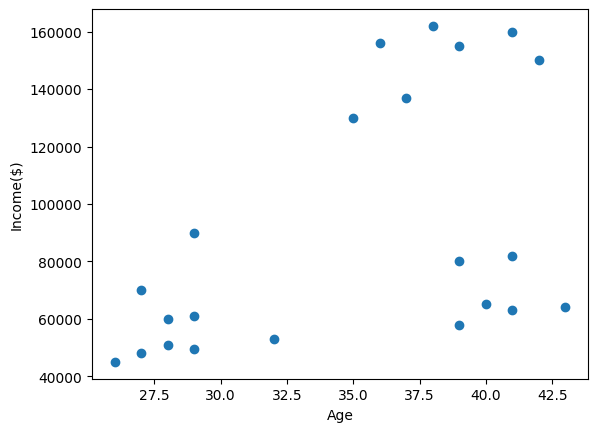

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
data.head()

plt.scatter(data.Age, data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()


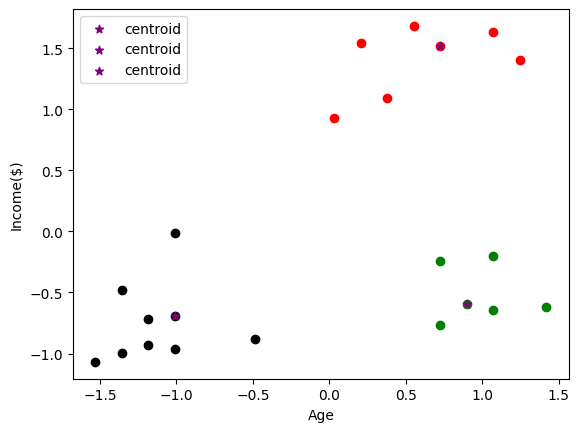

In [ ]:
# Preprocessing
scaler = StandardScaler()
data[['Age', 'Income($)']] = scaler.fit_transform(data[['Age', 'Income($)']])

# K-Medoids clustering
k = 3
cluster_centers, clusters = kmedoids(data[['Age', 'Income($)']].values, k)

# Visualize the clustered data
colors = ['green', 'red', 'black']
for i in range(k):
    cluster_data = data[clusters == i]
    plt.scatter(cluster_data.Age, cluster_data['Income($)'], color=colors[i])
    plt.scatter(cluster_centers[i][0], cluster_centers[i][1], color='purple', marker='*', label='centroid')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

#CUSTOM IRIS

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [ ]:
# K-Medoids
k = 3
cluster_centers, clusters = kmedoids(data[['sepal_length', 'sepal_width']].values, k)  # Initialize K-Medoids clustering with 3 clusters
# kmedoids.fit(X)  # Fit the K-Medoids model to the data
# kmedoids_clusters = kmedoids.labels_  # Get the cluster labels for each data point

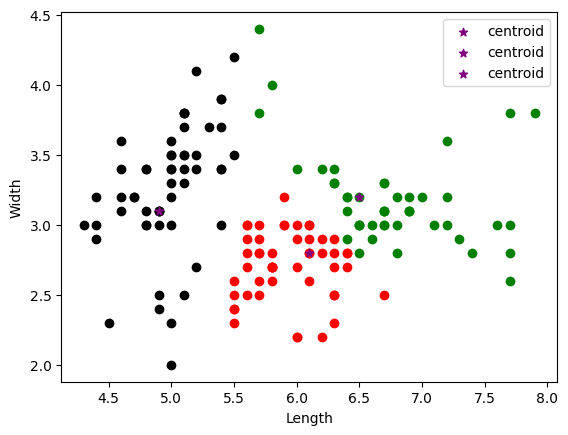

In [ ]:
colors = ['green', 'red', 'black']
for i in range(k):
    cluster_data = data[clusters == i]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], color=colors[i])
    plt.scatter(cluster_centers[i][0], cluster_centers[i][1], color='purple', marker='*', label='centroid')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()